In [98]:
import regressor as rg
from regressor import Regressor
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import math
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [3]:
def plot_boundary(w, ax=None):
    # y = (w[0] - x * w[1]) / w[2] : function for decision boundary
    if ax is None:
        figure, ax = plt.subplots()
        
    xs = ax.get_xlim()
    ys = [(w[0] - w[1] * x) / w[2] for x in xs]
    ax.plot(xs, ys, '--', c="red")

In [4]:
def plot_data(inputs, labels, weights=None, ax=None):
    if ax is None:
        figure, ax = plt.subplots()
        
    ax.scatter(inputs[:, 0], inputs[:, 1], c=labels)
    
    if weights is not None:
        plot_boundary(weights, ax)

In [5]:
regressor = Regressor(2) # Initialize a new Logistic Regressor with random weights

In [6]:
inputs, labels = make_blobs(n_samples=400, n_features=2, centers=2, random_state=0, cluster_std=0.55)

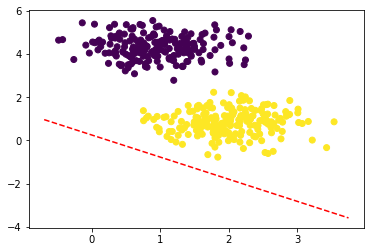

In [7]:
# Plot data and initial decision boundary
plot_data(inputs, labels, regressor.weights)

In [8]:
# Train for 3 epochs
regressor.sgd(inputs, labels, batch_size=10, lr=1)
regressor.sgd(inputs, labels, batch_size=20, lr=1e-1)
regressor.sgd(inputs, labels, batch_size=30, lr=1e-2)

Accuracy:  0.955
Accuracy:  0.9975
Accuracy:  1.0


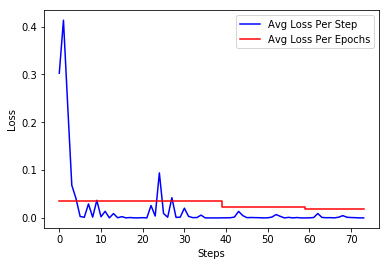

In [9]:
regressor.plot_loss()

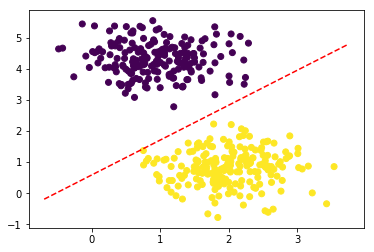

In [10]:
# Plot data and trained decision boundary
plot_data(inputs, labels, regressor.weights)

## Cross Validation

In [11]:
k = int(len(inputs) / 5)
folds = [(inputs[i:i+k], labels[i:i+k]) for i in range(0, len(inputs), k)]

train_set = folds[0:3]
train_inputs = np.concatenate([data[0] for data in train_set])
train_labels = np.concatenate([data[1] for data in train_set])

test_inputs, test_labels = folds[4]

In [12]:
regressor = Regressor(2) # Initialize a new Logistic Regressor with random weights

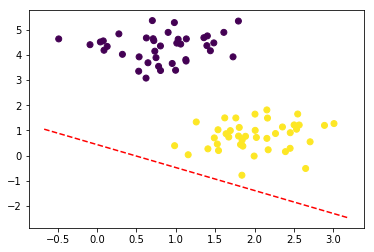

In [13]:
# Plot test data and initial decision boundary
plot_data(test_inputs, test_labels, regressor.weights)

In [14]:
# Train for 3 epochs on train data
regressor.sgd(train_inputs, train_labels, batch_size=10, lr=1)
regressor.sgd(train_inputs, train_labels, batch_size=20, lr=1e-1)
regressor.sgd(train_inputs, train_labels, batch_size=30, lr=1e-2)

Accuracy:  0.8416666666666667
Accuracy:  0.9958333333333333
Accuracy:  0.9958333333333333


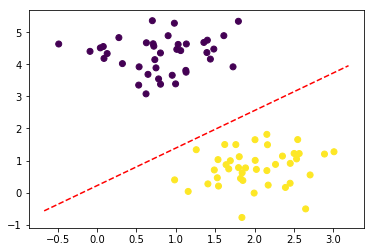

In [15]:
# Plot training data and trained decision boundary
plot_data(test_inputs, test_labels, regressor.weights)

In [16]:
loss_for_folds, accuracy_for_folds = zip(*[regressor.eval(x, r) for x, r in folds])
print(loss_for_folds)
print(accuracy_for_folds)

(0.008613061029665461, 0.0024350117341930965, 0.00011802480491437024, 0.006355777592975681, 0.0002652608810956061)
(0.9875, 1.0, 1.0, 1.0, 1.0)


Text(0.5,1,'Average Loss Per Fold')

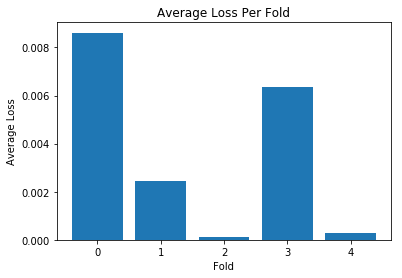

In [17]:
figure, ax = plt.subplots()
ax.bar(np.arange(len(loss_for_folds)), loss_for_folds)
ax.set_xlabel("Fold")
ax.set_ylabel("Average Loss")
ax.set_title("Average Loss Per Fold")

Text(0.5,1,'Accuracy Per Fold')

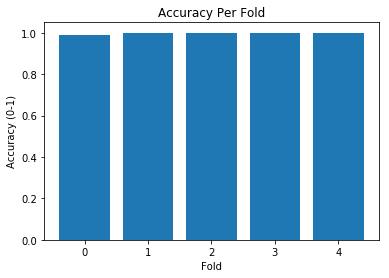

In [18]:
figure, ax = plt.subplots()
ax.bar(np.arange(len(accuracy_for_folds)), accuracy_for_folds)
ax.set_xlabel("Fold")
ax.set_ylabel("Accuracy (0-1)")
ax.set_title("Accuracy Per Fold")

## Question 3.

In [111]:
inputs_0 = inputs[labels == 1]
center = np.mean(inputs_0, axis=0)
distances = [((center[0] - x[0])**2 + (center[1] - x[1])**2)**(1./2.) for x in inputs_0]
r = np.max(distances)

In [112]:
x_0s, x_1s = zip(*inputs_0)

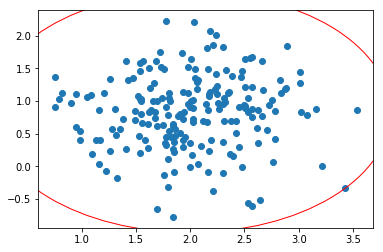

In [113]:
figure, ax = plt.subplots()
ax.add_artist(patches.Circle(center, r, color='red', fill=False))
ax.scatter(inputs_0[:, 0], inputs_0[:, 1])

In [114]:
np.cov(x_0s, x_1s)

array([[0.29444871, 0.01231928],
       [0.01231928, 0.31826125]])